# **Bioinformatics Project - Computational Drug Discovery**
# **Part 1**

**Author: Hubert Owusu**

This is a Bioinformatics Project on Computational Drug Discovery. However, instead of finding novel drug candidates for clinical conditions, this project seeks to build a machine learning algorithm that finds existing drug molecules that could potentially be repurposed to treat another medical condition. It uses a curated data from the ChEMBL Database on known drug candidates and their IC50 against the Replicase polyprotein 1ab protein, which is a target protein for the viral RNAs.

Replicase polyprotein 1ab is a large polyprotein encoded by the viral genome of coronaviruses, including SARS-CoV-2, the virus responsible for COVID-19. It plays a crucial role in viral replication and transcription. Due to its essential role in viral replication, components of polyprotein 1ab, particularly the proteases and RdRp, have been targeted in drug development for antiviral therapies. Example include remdesivir targets RdRp

---

### **ChEMBL Database**

The [*ChEMBL Database*](https://www.ebi.ac.uk/chembl/) is a database that contains curated bioactivity data of more than 2 million compounds. It is compiled from more than 76,000 documents, 1.2 million assays and the data spans 13,000 targets and 1,800 cells and 33,000 indications.
[Data as of March 25, 2020; ChEMBL version 26].

### **Installing libraries**

Install the ChEMBL web service package so that we can retrieve bioactivity data from the ChEMBL Database.

In [ ]:
! pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.6 MB/s eta 0:00:00


### **Importing libraries**

In [1]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

### **Search for Target protein**

### **Target search for Coronavirus**

In [2]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('coronavirus')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
2,[],Murine coronavirus,Murine coronavirus,14.0,False,CHEMBL5209664,[],ORGANISM,694005
3,[],Canine coronavirus,Canine coronavirus,14.0,False,CHEMBL5291668,[],ORGANISM,11153
4,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
5,[],Human coronavirus OC43,Human coronavirus OC43,13.0,False,CHEMBL5209665,[],ORGANISM,31631
6,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
7,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
8,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,4.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859
9,[],Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,4.0,False,CHEMBL4523582,"[{'accession': 'P0DTD1', 'component_descriptio...",SINGLE PROTEIN,2697049


### **Select and retrieve bioactivity data for *Replicase polyprotein 1ab* of the SARS-CoV-2 (Tenth entry)**

We will assign the fifth entry (which corresponds to the target protein, (**Replicase polyprotein 1ab**) to the ***selected_target*** variable

In [3]:
selected_target = targets.target_chembl_id[9]
selected_target

'CHEMBL4523582'

Here, we will retrieve only bioactivity data for *Replicase polyprotein 1ab* (CHEMBL4523582) that are reported as pChEMBL values.

In [4]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [5]:
df = pd.DataFrame.from_dict(res)

In [6]:
df.shape

(1538, 46)

In [7]:
df.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,None,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,None,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,None,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,None,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04


Finally we will save the resulting bioactivity data to a CSV file **bioactivity_data.csv**.

In [8]:
df.to_csv('Replicase_polyprotein_1ab_01_bioactivity_data_raw.csv', index=False)

### **Handling missing data**
If any compounds has missing value for the **standard_value** and **canonical_smiles** column then drop it.

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2.head()

C:\Users\huber\AppData\Local\Temp\ipykernel_14256\1808944267.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,Dtt Insensitive,19964199,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.39
1,None,Dtt Insensitive,19964200,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.21
2,None,Dtt Insensitive,19964201,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.08
3,None,Dtt Insensitive,19964202,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,1.58
4,None,Dtt Insensitive,19964203,[],CHEMBL4495583,SARS-CoV-2 3CL-Pro protease inhibition IC50 de...,F,None,None,BAO_0000190,...,Severe acute respiratory syndrome coronavirus 2,Replicase polyprotein 1ab,2697049,None,None,IC50,uM,UO_0000065,None,0.04


In [10]:
df2.shape

(1455, 46)

In [11]:
len(df2.canonical_smiles.unique())

1136

In [12]:
df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr.shape

(1136, 46)

### **Data pre-processing of the bioactivity data**

Let's combine the 3 columns (molecule_chembl_id,canonical_smiles,standard_value) and bioactivity_class into a DataFrame

In [13]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0


Saves dataframe to CSV file

In [14]:
df3.to_csv('Replicase_polyprotein_1ab_02_bioactivity_data_preprocessed.csv', index=False)

### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [15]:
bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')

# We need to reset the index because some duplicated rows were removed earlier.
df3_reset = df3.reset_index(drop=True)
bioactivity_class_reset = bioactivity_class.reset_index(drop=True)

# Concatenate after resetting indices
df4 = pd.concat([df3_reset, bioactivity_class_reset], axis=1)
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active


Saves dataframe to CSV file

In [17]:
df4.to_csv('Replicase_polyprotein_1ab_03_bioactivity_data_curated.csv', index=False)

# Exploratory Data Analysis

In [18]:
df4 = pd.read_csv('Replicase_polyprotein_1ab_03_bioactivity_data_curated.csv')
df4.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active


In [19]:
df_no_smiles = df4.drop(columns='canonical_smiles')

smiles = []

for i in df4.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [20]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles.head(10)

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL480,390.0,active,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1
1,CHEMBL178459,210.0,active,Cc1c(-c2cnccn2)ssc1=S
2,CHEMBL3545157,80.0,active,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1
3,CHEMBL297453,1580.0,intermediate,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...
4,CHEMBL4303595,40.0,active,O=C1C=Cc2cc(Br)ccc2C1=O
5,CHEMBL444186,3190.0,intermediate,CC(CN1CC(=O)NC(=O)C1)N1CC(=O)NC(=O)C1
6,CHEMBL55400,360.0,active,Nc1ccc2cc3ccc(N)cc3nc2c1
7,CHEMBL1886408,200.0,active,CCOC(=O)Cc1ccc(-c2ccccc2)cc1
8,CHEMBL505670,100.0,active,O=[N+]([O-])c1ccc(Sc2cccc[n+]2[O-])c2nonc12
9,CHEMBL460499,160.0,active,CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O


### **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

In [ ]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 56.4 MB/s eta 0:00:00


In [21]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculate descriptors**

In [22]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [23]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,369.368,3.51522,1.0,4.0
1,226.351,3.30451,0.0,5.0
2,334.400,3.26220,0.0,5.0
3,458.375,2.23320,8.0,11.0
4,237.052,2.22770,0.0,2.0


In [24]:
df_combined = pd.concat([df4,df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,390.0,active,369.368,3.51522,1.0,4.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,210.0,active,226.351,3.30451,0.0,5.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,80.0,active,334.400,3.26220,0.0,5.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,1580.0,intermediate,458.375,2.23320,8.0,11.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,40.0,active,237.052,2.22770,0.0,2.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [25]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i * (10**-9)  # Converts nM to M

        # Avoid log10 of zero by setting a small value
        if molar == 0:
            pIC50_value = -np.log10(1e-9)
        else:
            pIC50_value = -np.log10(molar)

        pIC50.append(pIC50_value)

    input['pIC50'] = pIC50
    x = input.drop(columns='standard_value_norm')

    return x

Lets fix values greater than 100,000,000 at 100,000,000 otherwise the negative logarithmic value will become negative.

In [26]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        i = float(i)
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop(columns='standard_value')

    return x

In [27]:
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,390.0
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,210.0
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,80.0
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,1580.0
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,40.0


In [28]:
df_norm.standard_value_norm.describe()

count      1136.000000
mean      12265.795232
std       31680.470990
min           0.013000
25%         180.000000
50%         845.000000
75%        7610.000000
max      425000.000000
Name: standard_value_norm, dtype: float64

In [29]:
df_final = pIC50(df_norm)
df_final.head(10)

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
3,CHEMBL297453,O=C(O[C@@H]1Cc2c(O)cc(O)cc2O[C@@H]1c1cc(O)c(O)...,intermediate,458.375,2.23320,8.0,11.0,5.801343
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
5,CHEMBL444186,CC(CN1CC(=O)NC(=O)C1)N1CC(=O)NC(=O)C1,intermediate,268.273,-2.70830,2.0,6.0,5.496209
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697
7,CHEMBL1886408,CCOC(=O)Cc1ccc(-c2ccccc2)cc1,active,240.302,3.45920,0.0,2.0,6.698970
8,CHEMBL505670,O=[N+]([O-])c1ccc(Sc2cccc[n+]2[O-])c2nonc12,active,290.260,1.91560,0.0,7.0,7.000000
9,CHEMBL460499,CCCCCCNC(=O)n1cc(F)c(=O)[nH]c1=O,active,257.265,0.81370,2.0,4.0,6.795880


In [30]:
df_final.to_csv('Replicase_polyprotein_1ab_04_bioactivity_data_3class_pIC50.csv')

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [31]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL480,Cc1c(OCC(F)(F)F)ccnc1C[S+]([O-])c1nc2ccccc2[nH]1,active,369.368,3.51522,1.0,4.0,6.408935
1,CHEMBL178459,Cc1c(-c2cnccn2)ssc1=S,active,226.351,3.30451,0.0,5.0,6.677781
2,CHEMBL3545157,O=c1sn(-c2cccc3ccccc23)c(=O)n1Cc1ccccc1,active,334.400,3.26220,0.0,5.0,7.096910
4,CHEMBL4303595,O=C1C=Cc2cc(Br)ccc2C1=O,active,237.052,2.22770,0.0,2.0,7.397940
6,CHEMBL55400,Nc1ccc2cc3ccc(N)cc3nc2c1,active,209.252,2.55240,2.0,3.0,6.443697


In [32]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

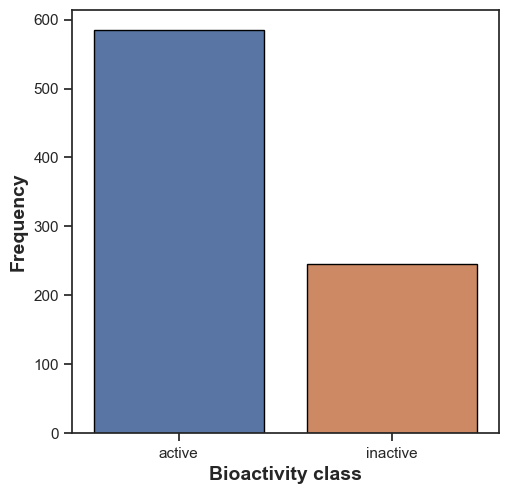

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

### **Viewing Molecular Weight Plotted Against Various Parameters**

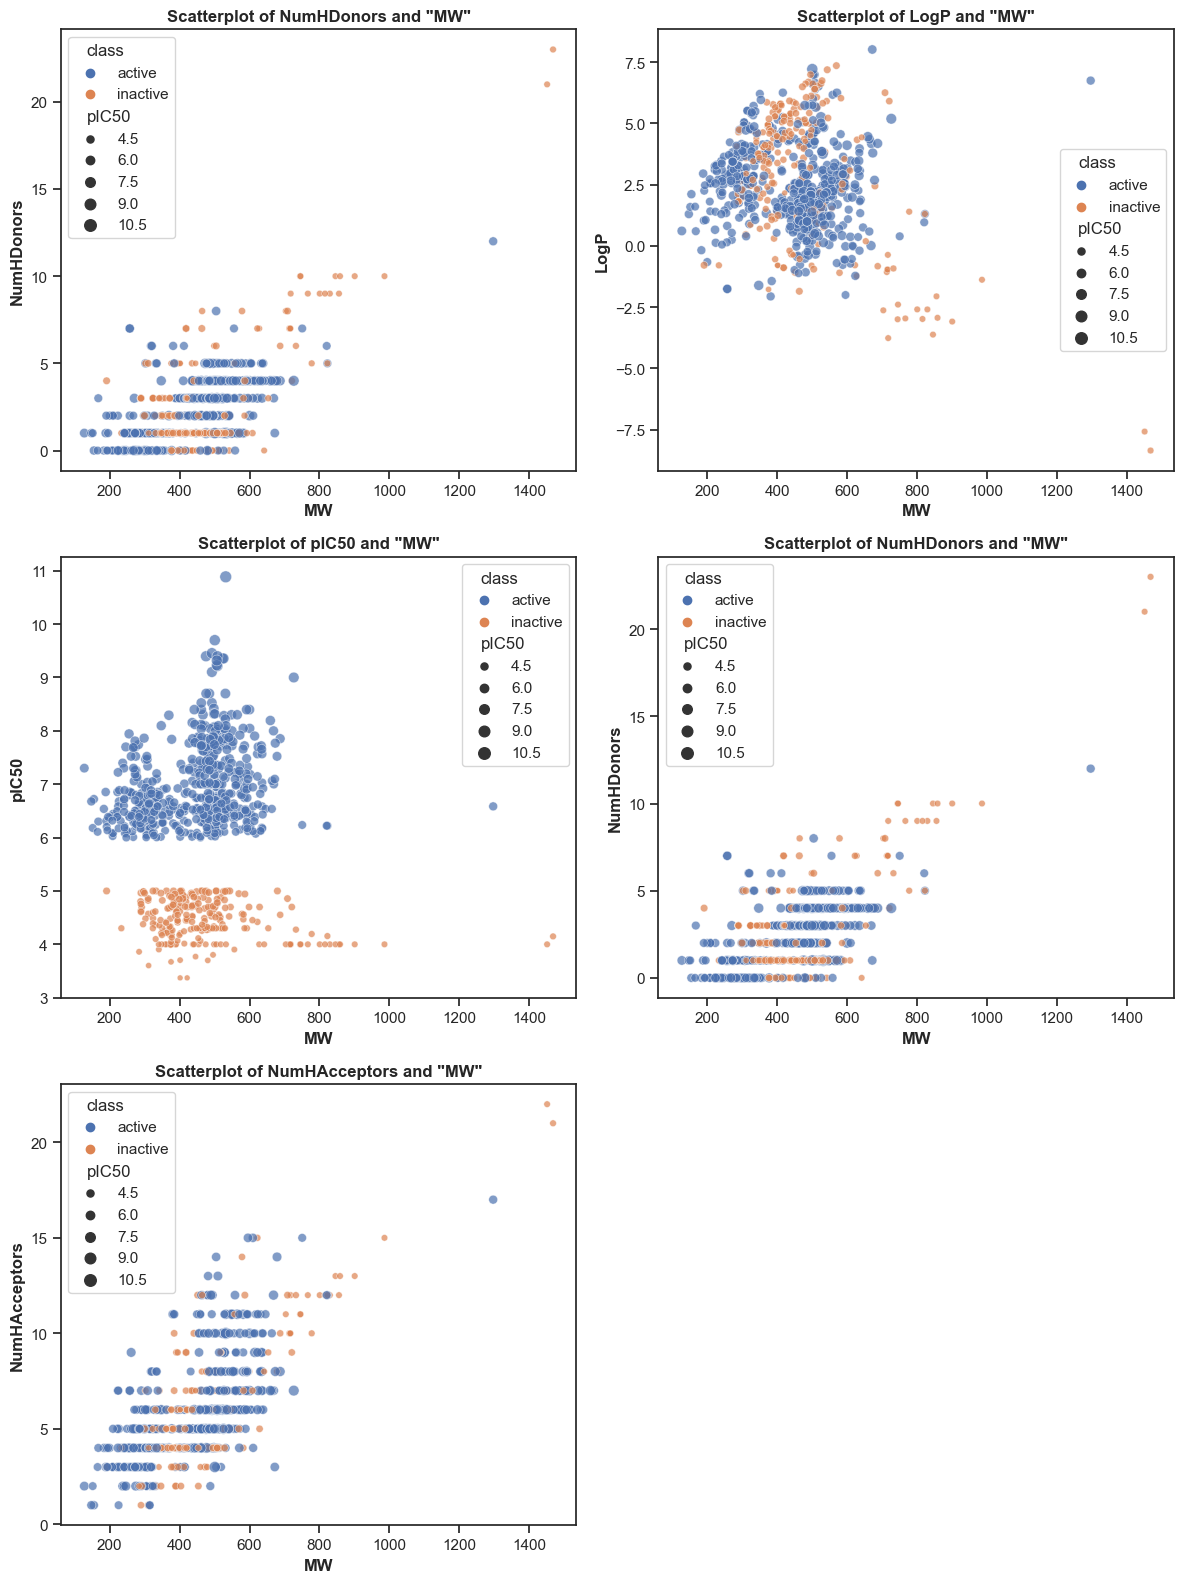

In [34]:
plt.figure(figsize=(12, 16))
columns = ['NumHDonors', 'LogP', 'pIC50', 'NumHDonors', 'NumHAcceptors']


for i, column in enumerate(columns):
    plt.subplot(3, 2, i + 1)

    sns.scatterplot(x='MW', y=column, data=df_2class, hue='class', size='pIC50', alpha=0.7)

    plt.xlabel('MW', fontsize=12, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')
    plt.title(f'Scatterplot of {column} and "MW"', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()




### **Statistical analysis | Mann-Whitney U Test**

In [35]:
from scipy.stats import mannwhitneyu

In [36]:
def mannwhitney_tests(df, descriptors, target_class, verbose=False):
    results = []

    # Perform Mann-Whitney U test for each descriptor
    for descriptor in descriptors:
        data = df[[descriptor, target_class]]

        # Separate active and inactive classes
        active = data[data[target_class] == 'active'][descriptor]
        inactive = data[data[target_class] == 'inactive'][descriptor]

        active_mean = active.mean()
        active_std = active.std()

        inactive_mean = inactive.mean()
        inactive_std = inactive.std()

        stat, p = mannwhitneyu(active, inactive)

        results.append({
            'Descriptor': descriptor,
            'Active (Mean ± Std)': f'{round(active_mean, 3)} ± {round(active_std, 3)}',
            'Inactive (Mean ± Std)': f'{round(inactive_mean, 3)} ± {round(inactive_mean, 3)}',
            'p_value': round(p, 10),
        })

    results_df = pd.DataFrame(results)

    # Save results to CSV
    results_df.to_csv('mannwhitneyu_results.csv', index=False)

    return results_df

In [37]:
columns = ['NumHDonors', 'MW', 'LogP', 'pIC50', 'NumHDonors', 'NumHAcceptors']

mannwhitney_tests(df_2class, columns, 'class')

,Descriptor,Active (Mean ± Std),Inactive (Mean ± Std),p_value
0,NumHDonors,2.511 ± 1.71,2.624 ± 2.624,0.011112
1,MW,443.52 ± 127.997,470.784 ± 470.784,0.931829
2,LogP,2.376 ± 1.603,2.852 ± 2.852,0.000004
3,pIC50,6.928 ± 0.727,4.453 ± 4.453,0.000000
4,NumHDonors,2.511 ± 1.71,2.624 ± 2.624,0.011112
5,NumHAcceptors,5.834 ± 2.462,6.073 ± 6.073,0.844226


### **Plotting Some Boxplots To Show The Differences In the Parametes**

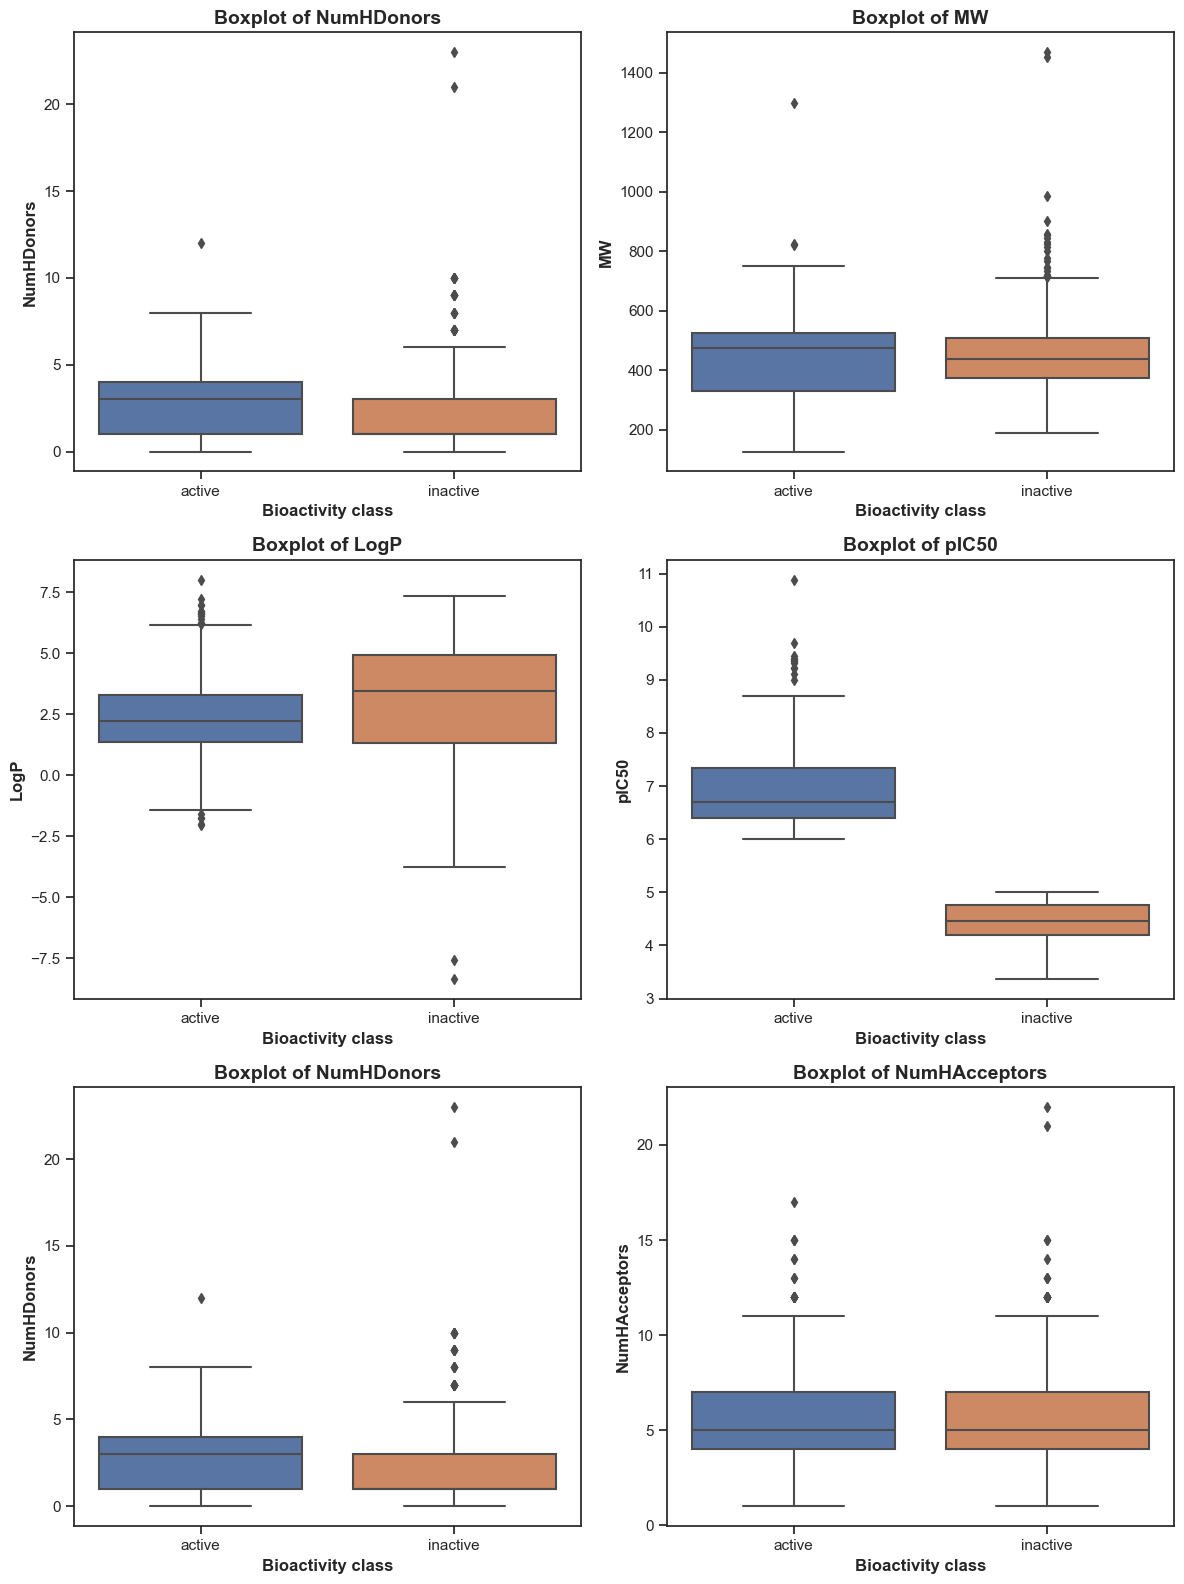

In [38]:
plt.figure(figsize=(12, 16))

# Loop through each column and create a subplot
for i, column in enumerate(columns):
    plt.subplot(3, 2, i + 1)

    sns.boxplot(x='class', y=column, data=df_2class)

    plt.xlabel('Bioactivity class', fontsize=12, fontweight='bold')
    plt.ylabel(column, fontsize=12, fontweight='bold')
    plt.title(f'Boxplot of {column}', fontsize=14, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.show()

### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.